In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append(rf"D:\code\pywfn")
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.atomprop import activity,direction
from pywfn.bondprop import piDM
from pywfn.maths import points_rotate
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from pywfn.utils import printer
printer.ifShell=False

动态链接库目录 D:\code\pywfn\pywfn\libs
当前系统:windows


In [3]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\反极性卡宾"
# root=r'D:\BaiduSyncdisk\Articles\HFV\gfile\NHC\NHC-wfn'
names=['NHC_wfn','since4_s_wfn']
atoms=[1,13]
results={}
for n,name in enumerate(names):
    mn=Mol(LogReader(f'{root}/{name}-.log'))
    m0=Mol(LogReader(f'{root}/{name}0.log'))
    mp=Mol(LogReader(f'{root}/{name}+.log'))
    # mols=[mn,m0,mp]
    
    for m,mol in enumerate([mn,m0,mp]):
        caler=activity.Calculator(mol)
        dirCaler=direction.Calculator(mol)
        dirs=dirCaler.reactions(atoms[n])
        result=caler.freeValence(atoms[n],dirs)
        results[f'{n},{m}']=result

[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[-0.9984 -2.4307  0.    ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]
[[ 4.2125  0.9801 -0.664 ]]


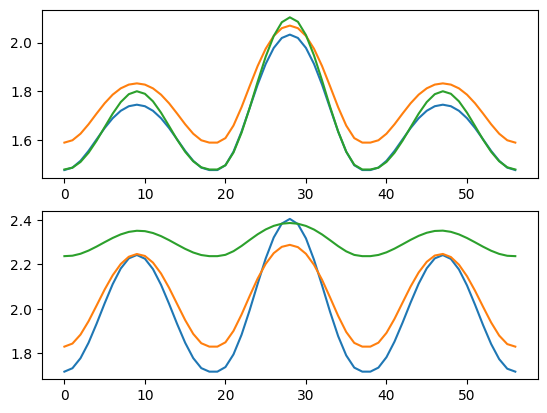

In [4]:
fig,axs=plt.subplots(2)
for n in range(2):
    for m in range(3):
        val=results[f'{n},{m}'][:,-1]
        axs[n].plot(val)

In [21]:
for a,x,y,z,v in results['0,2']:
    print(f'[{x:>8.4f},{y:>8.4f},{z:>8.4f},{v:>8.4f}],')
val=results['0,2'][:,-1]
np.argmax(val),np.max(val)

[  1.0000,  0.0011, -0.0000,  1.4799],
[  0.9850, -0.1318,  0.1118,  1.4874],
[  0.9400, -0.2607,  0.2202,  1.5108],
[  0.8665, -0.3816,  0.3219,  1.5486],
[  0.7666, -0.4910,  0.4138,  1.5978],
[  0.6435, -0.5855,  0.4931,  1.6534],
[  0.5008, -0.6621,  0.5575,  1.7087],
[  0.3428, -0.7187,  0.6049,  1.7562],
[  0.1745, -0.7534,  0.6340,  1.7885],
[  0.0009, -0.7652,  0.6438,  1.8004],
[ -0.1728, -0.7538,  0.6340,  1.7901],
[ -0.3412, -0.7195,  0.6049,  1.7592],
[ -0.4992, -0.6633,  0.5575,  1.7128],
[ -0.6421, -0.5869,  0.4931,  1.6579],
[ -0.7655, -0.4928,  0.4138,  1.6022],
[ -0.8656, -0.3836,  0.3219,  1.5524],
[ -0.9394, -0.2628,  0.2202,  1.5136],
[ -0.9847, -0.1340,  0.1118,  1.4889],
[ -1.0000, -0.0011,  0.0000,  1.4799],
[  1.0000,  0.0011, -0.0000,  1.4799],
[  0.9850, -0.1725, -0.0000,  1.4973],
[  0.9401, -0.3409, -0.0000,  1.5494],
[  0.8666, -0.4990, -0.0000,  1.6304],
[  0.7668, -0.6419, -0.0000,  1.7309],
[  0.6437, -0.7653, -0.0000,  1.8392],
[  0.5010, -0.8655, -0.00

(np.int64(28), np.float64(2.103336637083749))

上图，蓝色(-1)，黑色(0)，红色(+1)依次电子数量减1
下图，蓝色：(黑-蓝)，红色：(红-黑)


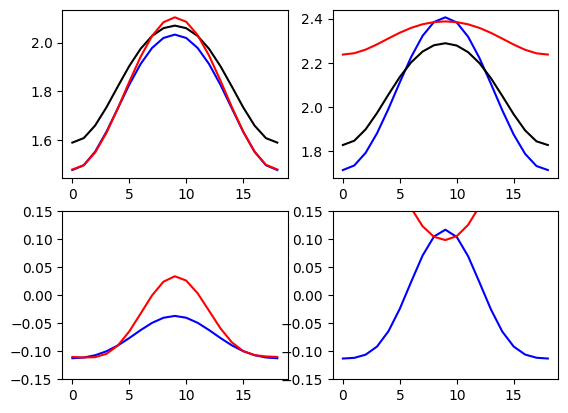

In [4]:
fig,axs=plt.subplots(2,2)
cs=['blue','black','red']
for n,name in enumerate(names):
    for m,mol in enumerate([mn,m0,mp]):
        vals=results[f'{n},{m}'][:,-1]
        axs[0,n].plot(vals,color=cs[m])
    vale=results[f'{n},0'][:,-1]-results[f'{n},1'][:,-1]
    valn=results[f'{n},2'][:,-1]-results[f'{n},1'][:,-1]
    axs[1,n].plot(vale,color='b')
    axs[1,n].plot(valn,color='r')
    axs[1,n].set_ylim(-0.15,0.15)
print('上图，蓝色(-1)，黑色(0)，红色(+1)依次电子数量减1')
print('下图，蓝色：(黑-蓝)，红色：(红-黑)')

In [9]:
np.max(results[f'0,{2}'][:,-1]),np.max(results[f'1,{0}'][:,-1])

(np.float64(2.103336637083749), np.float64(2.405493392362879))

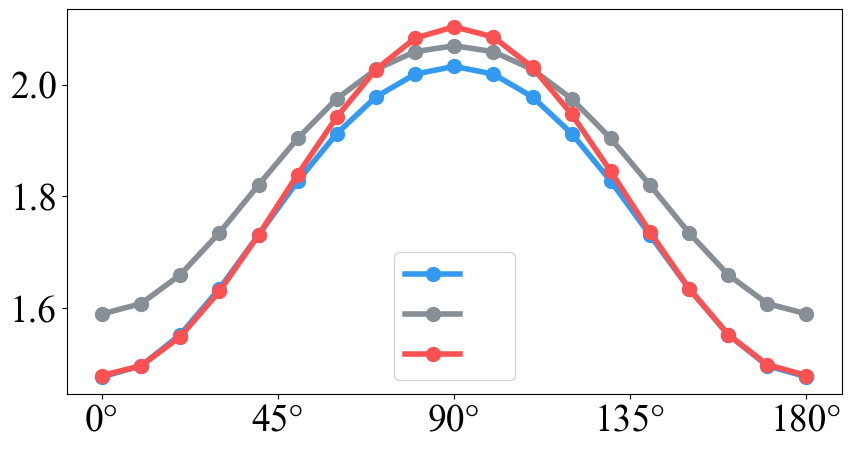

In [35]:
cs=['#339af0','#868e96','#fa5252']
xs=np.linspace(0,180,19)
xts=np.linspace(0,180,17,endpoint=True)[::4]
xtl=[f'{e:.0f}°' for e in xts]
fig,axs=plt.subplots(1,1,figsize=(10,5))
plt.rc('font',family='Times New Roman',size=25)
labels=['   ','   ','   ']
for i in range(3):
    axs.plot(xs,results[f'0,{i}'][:,-1],color=cs[i],marker='.',lw=4,ms=20,label=labels[i])
axs.set_xticks(xts,xtl)
plt.legend(fontsize=20, loc=8)
plt.savefig('图像/反极性卡宾/NHC.png',bbox_inches='tight',dpi=300)
plt.show()


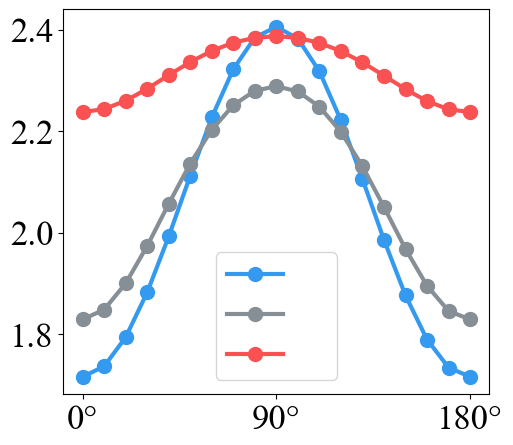

In [39]:
cs=['#339af0','#868e96','#fa5252']
xs=np.linspace(0,180,19)
xts=np.linspace(0,180,17,endpoint=True)[::8]
xtl=[f'{e:.0f}°' for e in xts]
fig,axs=plt.subplots(1,1,figsize=(5.5,5))
plt.rc('font',family='Times New Roman',size=25)
labels=['   ','   ','   ']
for i in range(3):
    axs.plot(xs,results[f'1,{i}'][:,-1],color=cs[i],marker='o',lw=3,ms=10,label=labels[i])
axs.set_xticks(xts,xtl)
plt.legend(fontsize=20, loc=8)
plt.savefig('图像/反极性卡宾/since.png',bbox_inches='tight',dpi=300)
plt.show()